<a href="https://colab.research.google.com/github/vhrib/PUC/blob/main/Credito_AD_oficina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credito

## Carregar base de Dados

In [ ]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
# https://www.kaggle.com/competitions/bi-master-arvore-de-decisao
# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [ ]:
data = pd.read_csv('credito_train.csv')
data.head()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,0,948,0,552,4,119,0,58,48,119,0
1,1,0,320,1,459,10,64,0,50,6,0,0
2,1,0,300,0,804,9,75,0,29,48,140,1
3,1,0,469,1,404,12,56,1,38,0,0,0
4,1,0,480,0,471,12,65,1,27,120,0,1


In [ ]:
data.shape

(2017, 12)

In [ ]:
data.describe()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.00000,2017.000000,2017.000000,2017.000000
mean,0.524046,0.118493,967.521071,0.449182,565.216163,8.423897,102.719385,0.128904,41.08230,30.859693,30.735746,0.475954
std,0.678863,0.541291,894.434077,0.497534,292.282915,3.606966,64.750127,0.335177,13.21796,52.127102,94.082179,0.499545
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,470.000000,0.000000,407.000000,6.000000,66.000000,0.000000,30.00000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,640.000000,0.000000,491.000000,10.000000,83.000000,0.000000,39.00000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1140.000000,1.000000,620.000000,10.000000,118.000000,0.000000,52.00000,48.000000,0.000000,1.000000
max,3.000000,7.000000,9675.000000,1.000000,6000.000000,24.000000,719.000000,1.000000,70.00000,420.000000,1300.000000,1.000000


# Descreva os Passos para tratamento da base de dados
* Quais as etapas para treinar o modelo de AD ?
* Quais Pre-processamento voce faria nessa base de dados ?('credito.txt') Para treinar a árvore de decisão ?
# Pesquise sobre a função DecisionTreeClassifier (biblioteca sklearn.tree)
* O que os parâmetros **max_depth** e **min_samples_leaf** fazem ?
# Porque é importante testar diferentes parâmetros na AD?

# Pesquise sobre a função MinMaxScaler (bib sklearn.preprocessing)
* o que essa função faz ?



## Separar base em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = data.loc[:,data.columns != 'CLASSE']  # Entrada
y = data.CLASSE    # Saída
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)

In [ ]:
y.value_counts()

CLASSE
0    1057
1     960
Name: count, dtype: int64

In [ ]:
# Verificar proporção para teste para confirmar amostragem estratificada
print(0.2*y.value_counts()[0])
print(0.2*y.value_counts()[1])

211.4
192.0


In [ ]:
y_test.value_counts()

CLASSE
0    212
1    192
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

CLASSE
0    845
1    768
Name: count, dtype: int64

In [ ]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1613, 11)
(404, 11)
(1613,)
(404,)


##Machine Learning

In [ ]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed, max_depth=None, min_samples_leaf=1):
  '''
    funcao de treino model
    input:
    output:
  '''
  model = DecisionTreeClassifier(max_depth=max_depth,
                                 min_samples_leaf=min_samples_leaf,
                                 random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

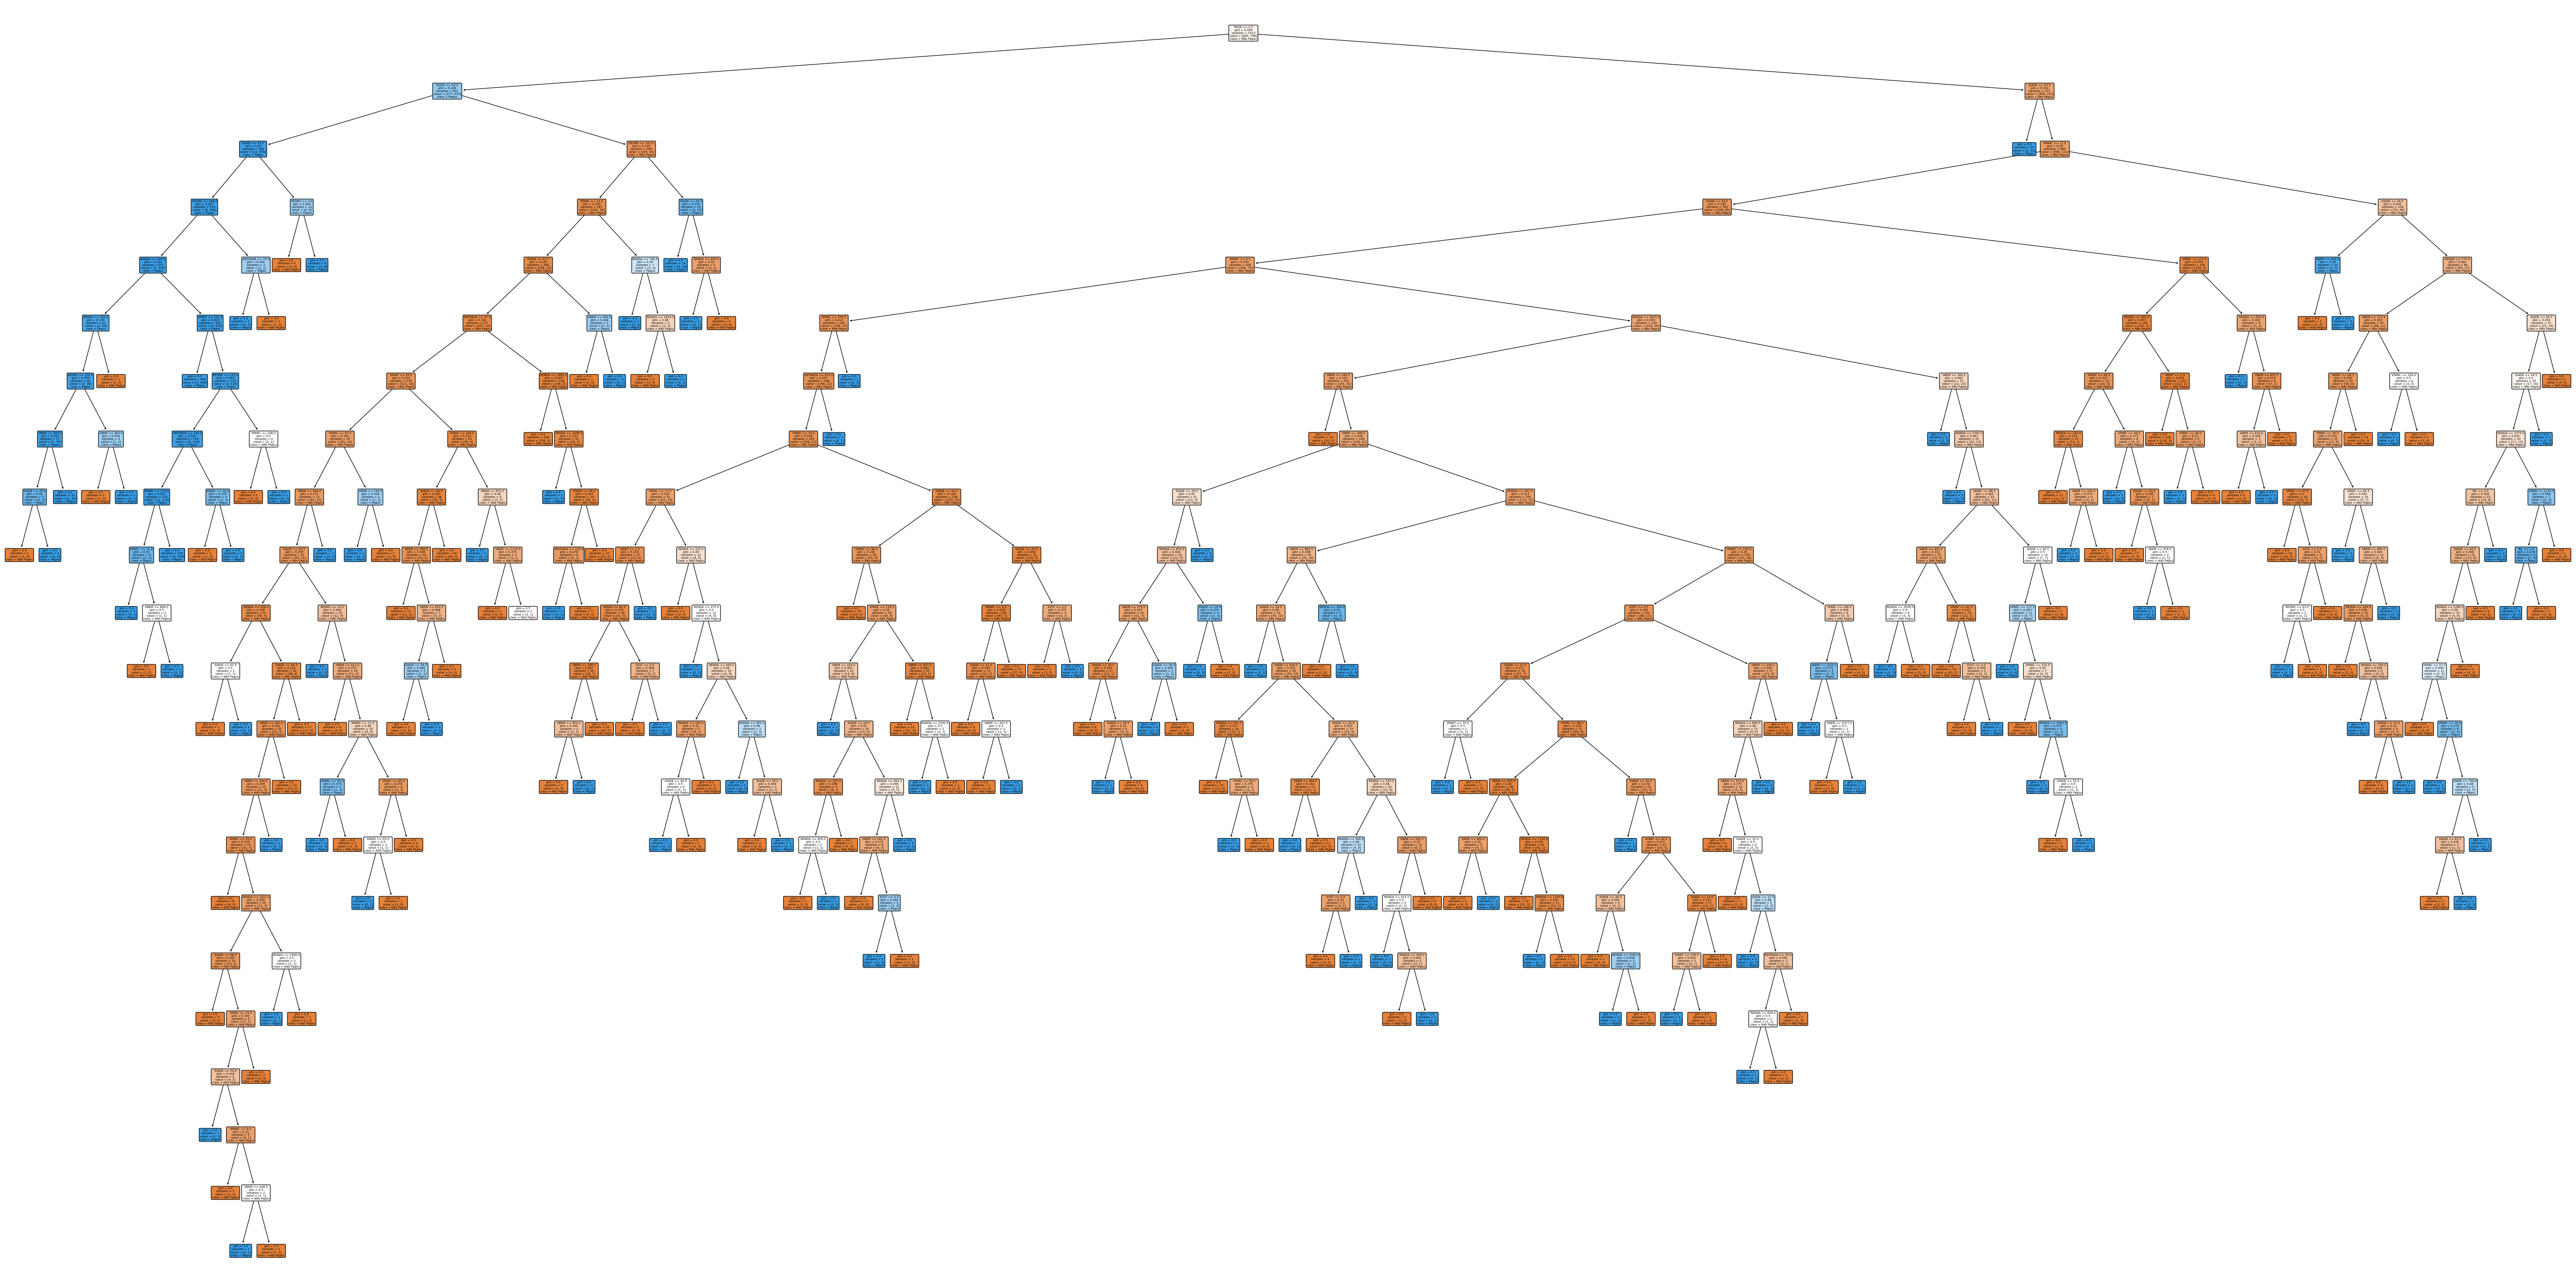

In [ ]:
# Visualização gráfica da árvore de decisão
from sklearn.tree import plot_tree
plt.subplots(figsize=(80, 40)) # Definir tamanho da imagem a ser gerada
plot_tree(model, class_names=['Não Pagou', 'Pagou'], feature_names=data.columns,
               filled=True, rounded=True); # plota a árvore

plt.savefig('tree.png') # Salva a imagem

In [ ]:
# profundidade da árvore
model.get_depth()

21

### Avaliar modelo treinado na base de teste

Resultados de Treino
Acurácia:  0.9993800371977681
Kappa:  0.9987571686251727
F1:  0.9993485342019545


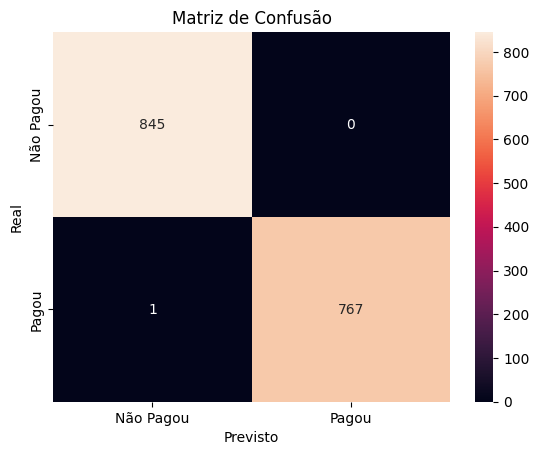

Resultados de Teste
Acurácia:  0.8465346534653465
Kappa:  0.693069306930693
F1:  0.8426395939086294


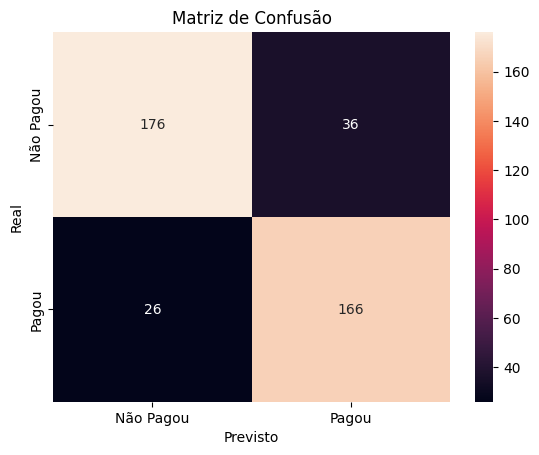

In [ ]:
def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test)

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Não Pagou', 'Pagou'])
  ax.yaxis.set_ticklabels(['Não Pagou', 'Pagou'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

### Testar outros Hiperparâmetros

Resultados de Treino
Acurácia:  0.9324240545567266
Kappa:  0.8643220888982521
F1:  0.927766732935719


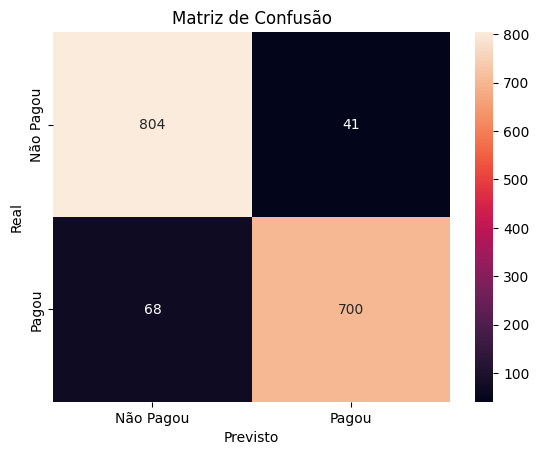

Resultados de Teste
Acurácia:  0.8762376237623762
Kappa:  0.7511334516065444
F1:  0.8655913978494624


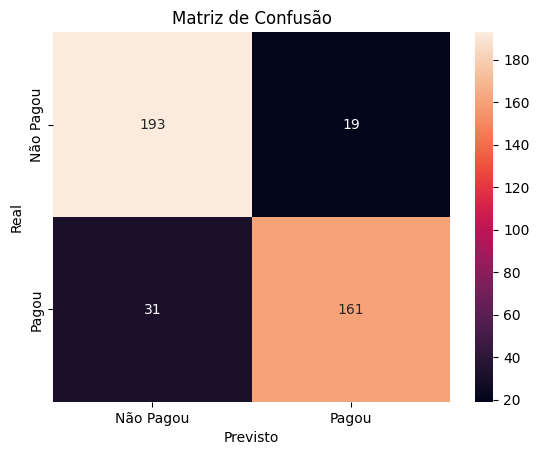

In [ ]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed, max_depth=155, min_samples_leaf=5)
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

###Normalizar

In [ ]:


from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#scaler_n = MinMaxScaler().fit(X_train)
#X_train = scaler_n.transform(X_train)
#X_test = scaler_n.transform(X_test)




Resultados de Treino
Acurácia:  0.9324240545567266
Kappa:  0.8643220888982521
F1:  0.927766732935719


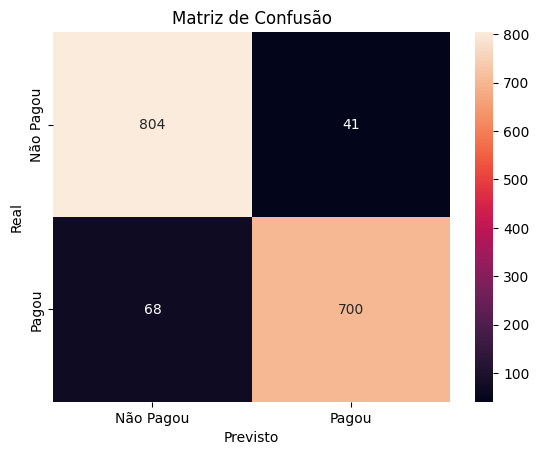

Resultados de Teste
Acurácia:  0.8762376237623762
Kappa:  0.7511334516065444
F1:  0.8655913978494624


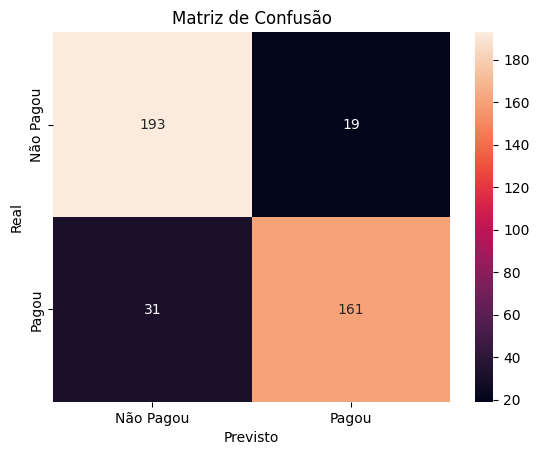

In [ ]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed, max_depth=155, min_samples_leaf=5)
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [2,4,5,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

# Executar o grid search
model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train);

In [ ]:
model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

Resultados de Treino
Acurácia:  0.907625542467452
Kappa:  0.8135348367730588
F1:  0.8949964763918252


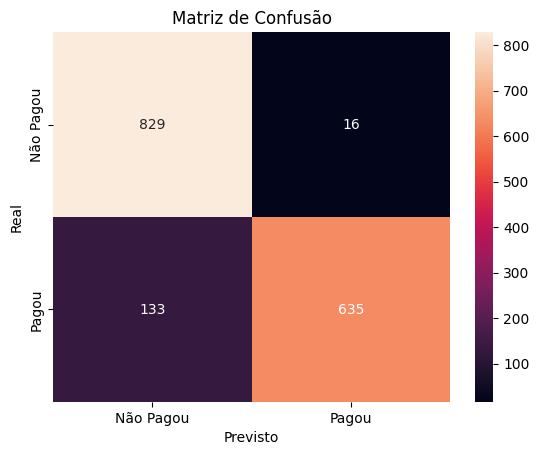

Resultados de Teste
Acurácia:  0.9158415841584159
Kappa:  0.83001683001683
F1:  0.903954802259887


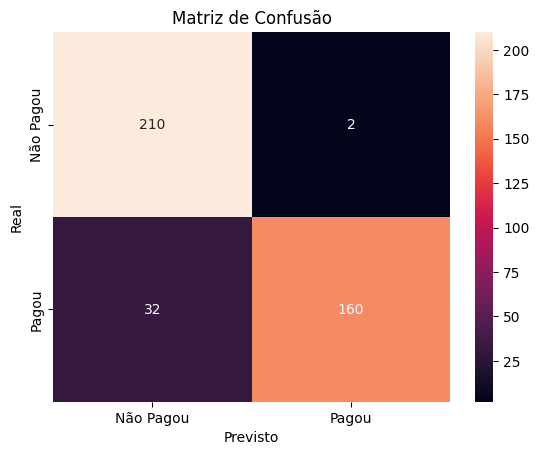

In [ ]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

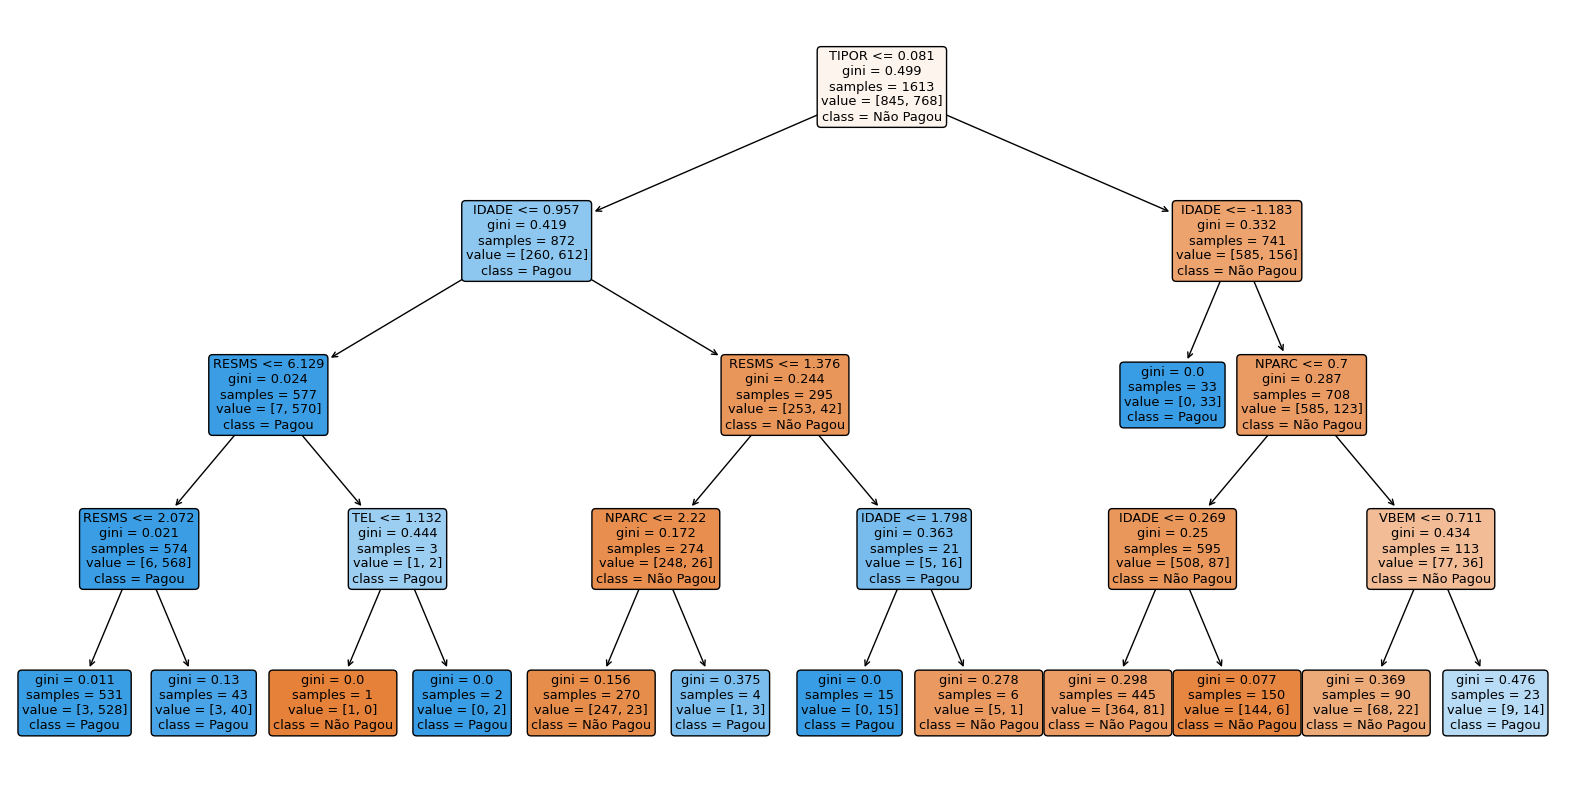

In [ ]:
# Visualização gráfica da árvore de decisão
plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
plot_tree(model.best_estimator_, class_names=['Não Pagou', 'Pagou'],
               filled=True, rounded=True, feature_names=data.columns);

plt.savefig('tree_final.png') # Salva a imagem

# Inferir novos dados com modelo treinado!

# Salvar Resultado Modelo

In [ ]:
new_data = pd.read_csv('credito_kaggle_sem_rotulo.csv')
#Aplicar os pré processamentos feitos no treino
new_data_normalized = scaler.transform(new_data)
# new_data_normalized = scaler_n.transform(new_data)

# 3. Faço as inferências
inferences = model.predict(new_data_normalized)
# 4. Construir data frame

df_results_kaggle = pd.DataFrame({'CLASSE':inferences})


df_results_kaggle['index_col'] = df_results_kaggle.index

df_results_kaggle=df_results_kaggle[['index_col','CLASSE']]
# 4. Save data frame

df_results_kaggle.to_csv('resultado_kaggle.csv',index=False)

In [ ]:
df_results_kaggle.head()

,index_col,CLASSE
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
